In [1]:
import pandas as pd
import numpy as np

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso

In [7]:
data = load_diabetes()

df = pd.DataFrame(data.data ,columns=data.feature_names)
df['target'] = data.target
df.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0


In [13]:
x_train,x_test,y_train,y_test = train_test_split(data.data , data.target , test_size=0.2 , random_state=23)
from sklearn.metrics import r2_score

In [16]:
coefs=[]
r2=[]

for i in [0,0.1,1,10]:
    regg=Lasso(alpha=i)
    regg.fit(x_train,y_train)
    coefs.append(regg.coef_.tolist())

    y_pre=regg.predict(x_test)
    r2.append(r2_score(y_test,y_pre))


C:\Users\raj\AppData\Local\Temp\ipykernel_18356\2102939621.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regg.fit(x_train,y_train)
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.922e+05, tolerance: 2.066e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [17]:
coefs

[[-19.84569916367357,
  -271.44799549763314,
  518.6056830808773,
  326.13921946479843,
  -1003.8701505319281,
  624.0419771669029,
  220.73390730817215,
  263.93738585966685,
  829.8567693731144,
  77.75019945004045],
 [-0.0,
  -193.62551082955608,
  506.10408882103087,
  265.89978806105773,
  -43.32508992690831,
  -0.0,
  -222.33665948058828,
  0.0,
  507.16534297039215,
  43.72121387219221],
 [0.0,
  -0.0,
  337.80290888781326,
  0.0,
  0.0,
  0.0,
  -0.0,
  0.0,
  332.18050643078254,
  0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0]]

In [18]:
r2

[0.45883899722433374,
 0.4709634855431918,
 0.32295010462483764,
 -0.07958837541657737]

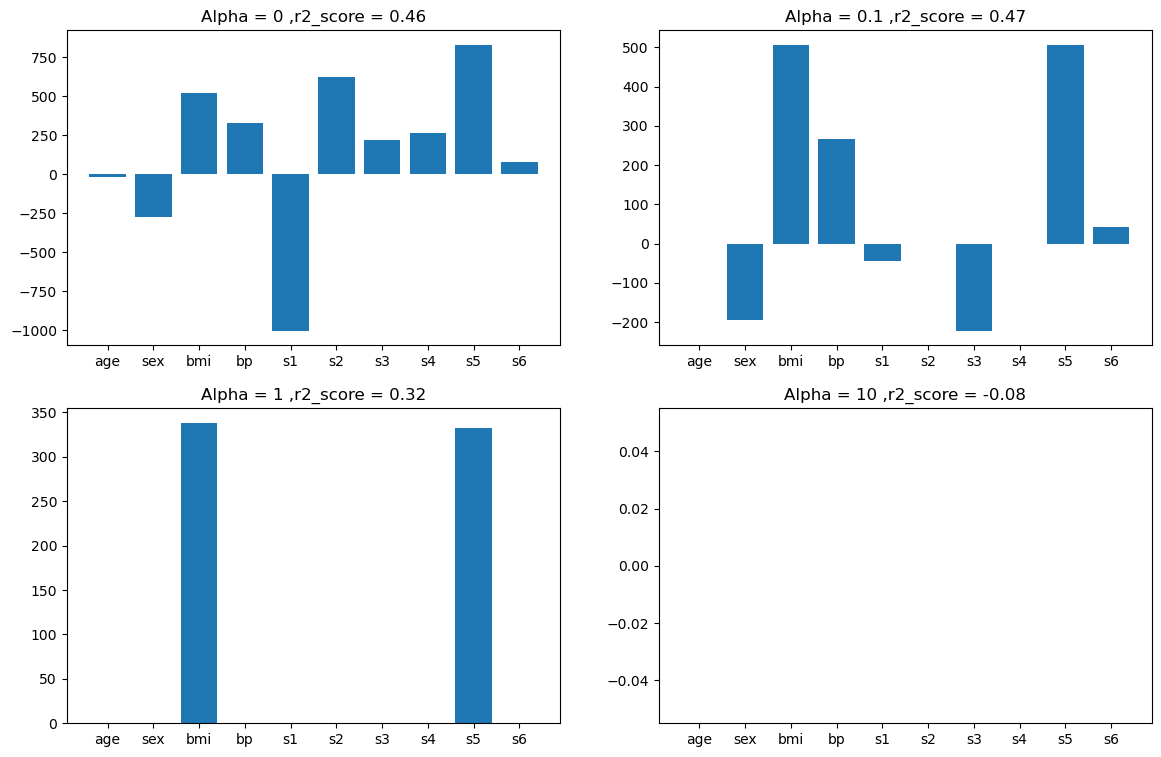

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 0.1 ,r2_score = {}'.format(round(r2[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 1 ,r2_score = {}'.format(round(r2[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2[3],2)))

plt.show()

In [23]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(x_train,y_train)
    
    coefs.append(reg.coef_.tolist())

C:\Users\raj\AppData\Local\Temp\ipykernel_18356\3450747153.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(x_train,y_train)
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.922e+05, tolerance: 2.066e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [24]:
input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-19.845699,-271.447995,518.605683,326.139219,-1003.870151,624.041977,220.733907,263.937386,829.856769,77.750199
0.0001,-19.733363,-271.421918,518.598603,326.035794,-996.201257,618.089537,217.121904,262.676817,827.175061,77.706707
0.0010,-18.722448,-271.187142,518.534814,325.105089,-927.203584,564.535241,184.623774,251.334411,803.047662,77.315345
0.0100,-10.849294,-265.104846,520.856831,318.124160,-484.603482,208.015191,-0.000000,204.877944,643.344617,73.195274
0.1000,-0.000000,-193.625511,506.104089,265.899788,-43.325090,-0.000000,-222.336659,0.000000,507.165343,43.721214
1.0000,0.000000,-0.000000,337.802909,0.000000,0.000000,0.000000,-0.000000,0.000000,332.180506,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [26]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(x_train,y_train)
    
    coefs.append(reg.coef_.tolist())

C:\Users\raj\AppData\Local\Temp\ipykernel_18356\3585109542.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(x_train,y_train)
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.922e+05, tolerance: 2.066e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


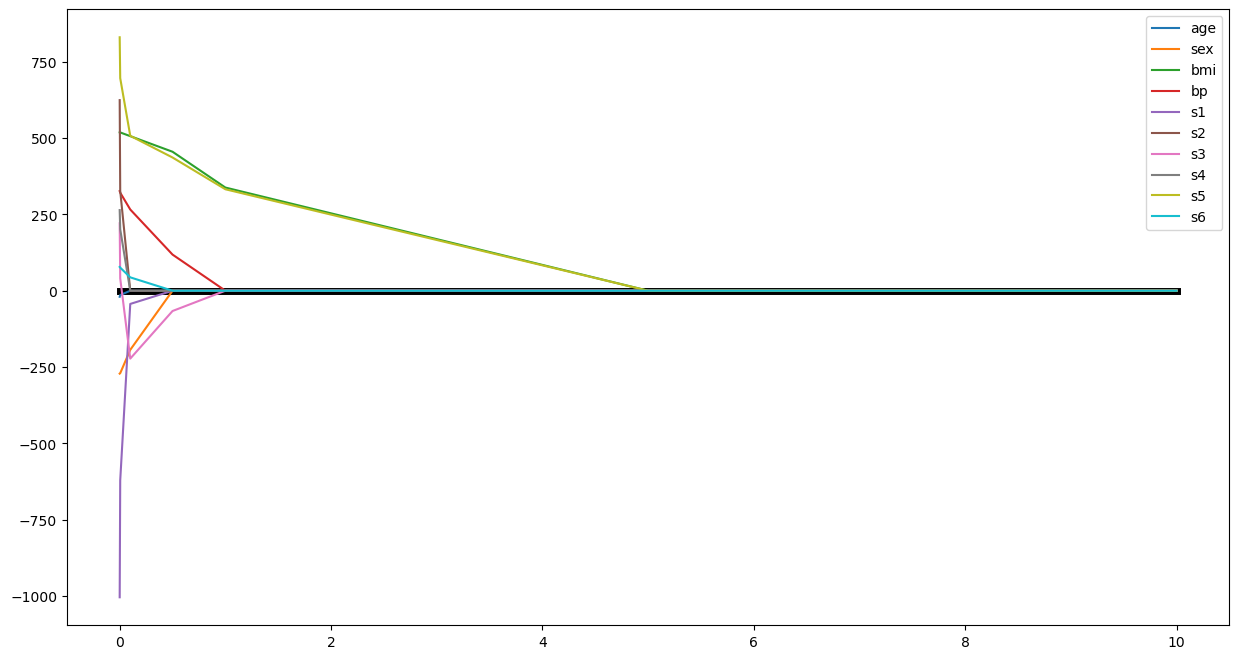

In [27]:
input_array = np.array(coefs).T

plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

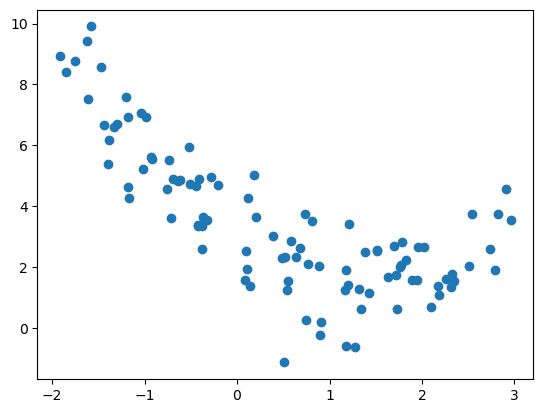

In [28]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()
lr.fit(X_train , y_train)
y_pre = lr.predict(X_test)
r2_score(y_test,y_pre)

0.7020682531348597

In [34]:
X_train.sha

(80, 11)

In [35]:
y_train.shape

(80,)